# Loan Eligibility Prediction

## Purpose
Predict whether or not a loan will be approved

## Dataset Description
Loan_ID - Unique Loan ID

Gender - Male/ Female

Married	- Applicant married (Y/N)

Dependents - Number of dependents

Education - Applicant Education (Graduate/ Under Graduate)

Self_Employed - Self employed (Y/N)

ApplicantIncome - Applicant income

CoapplicantIncome - Coapplicant income

LoanAmount - Loan amount in thousands

Loan_Amount_Term - Term of loan in months

Credit_History - credit history meets guidelines

Property_Area - Urban/ Semi Urban/ Rural

Loan_Status - Loan approved (Y/N)

**Dataset Source**: (https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan/data)


# Data Cleaning and Maniplulation

In [2]:
#import packages
import numpy as np
import pandas as pd

#load and view csv file
loan = pd.read_csv("/kaggle/input/eligibility-prediction-for-loan/Loan_Data.csv")
loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#get the basic info of the dataset
print(loan.info())

#get summary statistics
print(loan.describe())

#check for null values
print(loan.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         6

In [4]:
#handling missing data by filling it with the mode/median
loan['Gender'].fillna(loan['Gender'].mode()[0], inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace=True)
loan['LoanAmount'].fillna(loan['LoanAmount'].median(), inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0],inplace=True )
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace=True)

#check for null values
print(loan.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


# Data Visualisation and Analysis


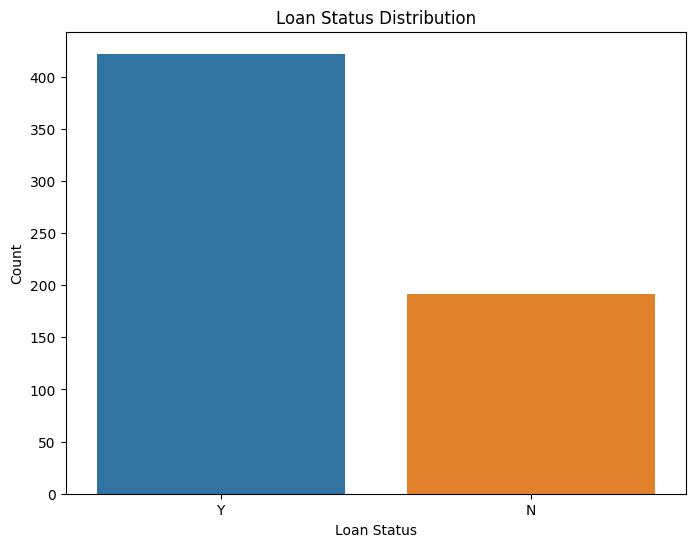

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#Loan Status Distribution graph
plt.figure(figsize=(8, 6))
sns.countplot(x= 'Loan_Status', data=loan)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

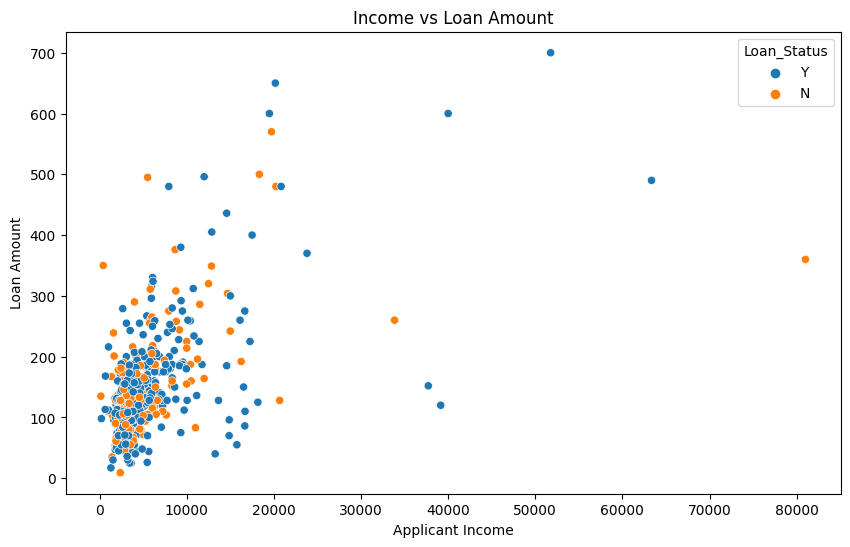

In [6]:
#Applicants Income vs Loan Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=loan)
plt.title('Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

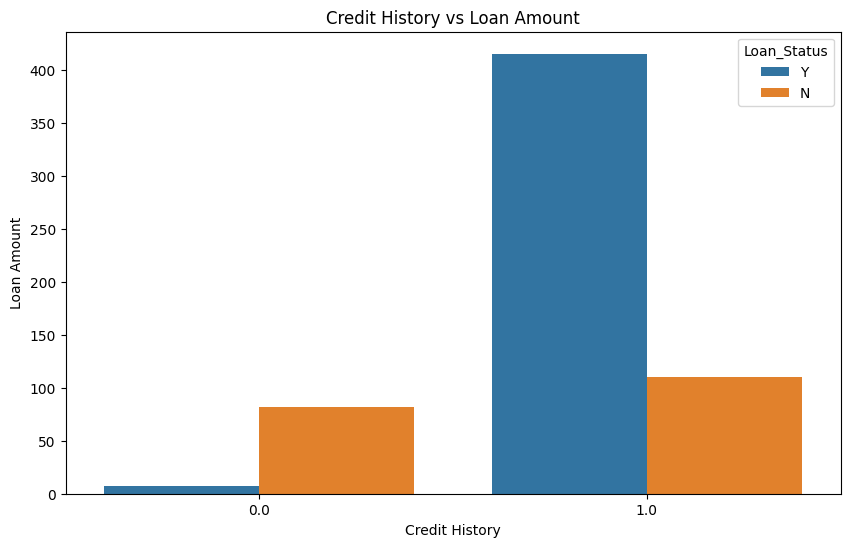

In [7]:
#Credit history vs loan amount
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_History', hue='Loan_Status', data=loan)
plt.title('Credit History vs Loan Amount')
plt.xlabel('Credit History')
plt.ylabel('Loan Amount')
plt.show

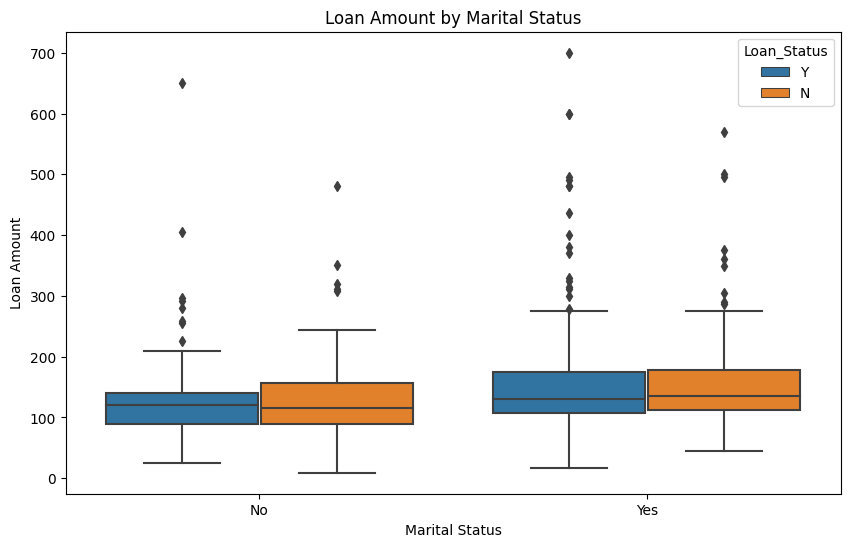

In [8]:
#loan amount based off marital status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Married', y='LoanAmount', hue='Loan_Status', data=loan)
plt.title('Loan Amount by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Loan Amount')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

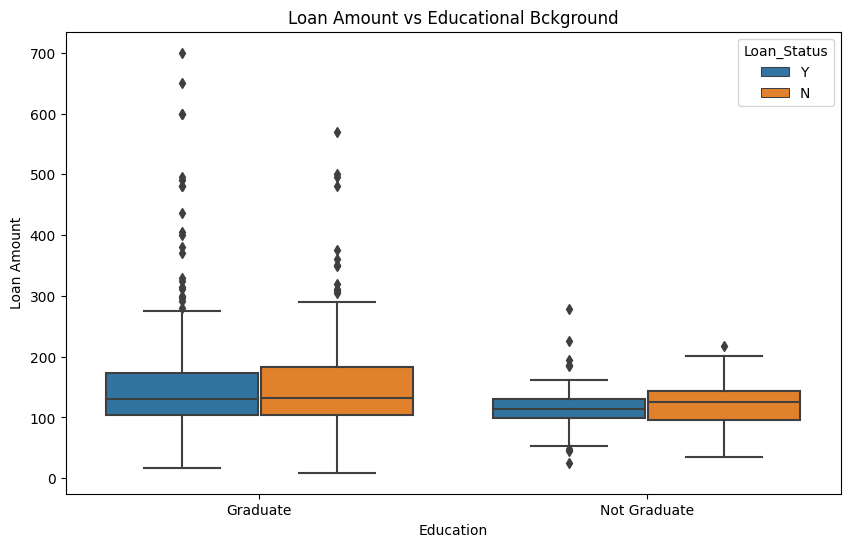

In [9]:
#loan amount based of educational backagroung
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='LoanAmount', hue='Loan_Status', data=loan)
plt.title('Loan Amount vs Educational Bckground')
plt.xlabel('Education')
plt.ylabel('Loan Amount')
plt.show

## Model Building

In [10]:

#Encode categorical variables
loan_encoded = pd.get_dummies(loan, drop_first=True)
loan_encoded.head(5)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,False,True,False,False,False,...,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,False,False,True,False,False,...,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,True


In [11]:
from sklearn.model_selection import train_test_split

#define features and target variables
features = loan_encoded.drop(columns=['Loan_Status_Y'])
target = loan_encoded['Loan_Status_Y']

#split the dataset
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fit and transform data
x_train_scaled = scaler.fit_transform(x_train)
#tranform the test data
x_test_scaled = scaler.transform(x_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier
#initialize the model
model = RandomForestClassifier()

#train the model
model.fit(x_train_scaled, y_train)

#make predictions
predictions = model.predict(x_test_scaled)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7886178861788617
Confusion Matrix:
[[18 25]
 [ 1 79]]
Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.42      0.58        43
        True       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

